In [94]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image 
import sys
import pandas as pd
from skimage import morphology
from mpl_toolkits.mplot3d import Axes3D

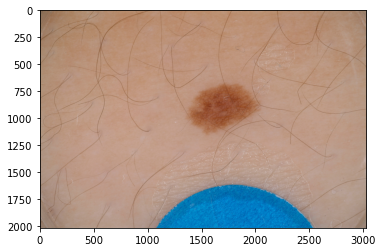

In [15]:
im = plt.imread('data/example_image/ISIC_0001769.jpg')
plt.imshow(im)

In [16]:
#A color image is a array with 3 dimensions (x, y, R-G-B color channels) of integers

print(im.shape)
print(im.dtype)

#Other packages might wrap the image in a different class - you are allowed to use those if you want

(2016, 3024, 3)
uint8


[  0 121 196]


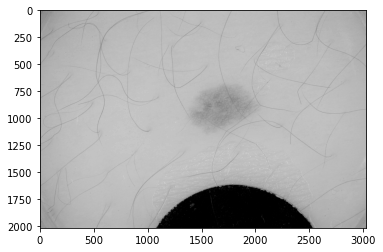

In [17]:
# Get a single RGB value from the blue circle (marker used by dermatologist)
print(im[2000,2000,:])

# Show only the red channel
plt.imshow(im[:,:,0], cmap='gray')

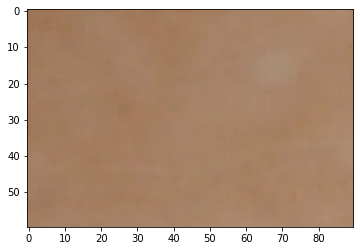

In [18]:
# Display only a part of the image

im_part = im[60:120,130:220,:]
plt.imshow(im_part)

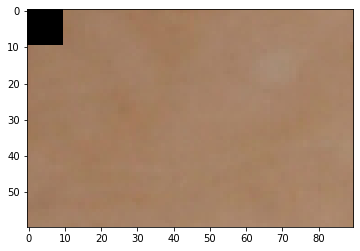

In [19]:
# Modify the image by setting some pixels to black

im_copy = im_part.copy()


im_copy[0:10,0:10,:] = np.tile(0, [10, 10, 3])
plt.imshow(im_copy)


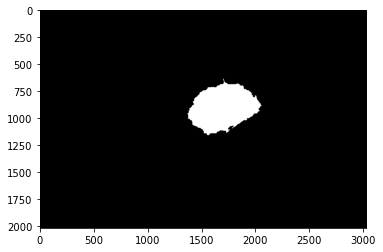

In [20]:
# Load the mask and display it

mask=plt.imread('data/example_segmentation/ISIC_0001769_segmentation.png')
plt.imshow(mask, cmap='gray')


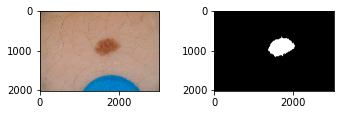

In [21]:
# Show image and mask side by side

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
axes[0].imshow(im)
axes[1].imshow(mask, cmap='gray')
fig.tight_layout()

(3024, 2016)


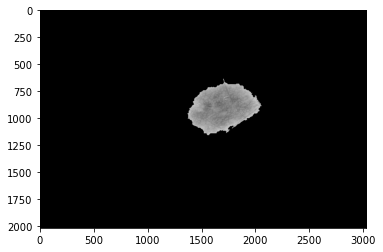

In [24]:
# Load images as Image objects  
img1 = Image.open('data/example_image/ISIC_0001769.jpg') 
img2 = Image.open('data/example_segmentation/ISIC_0001769_segmentation.png') 
  
# Overlay - more options such as transparency should be available here  
img2.paste(img1, (0,0), mask = img2) 
  
# Display 
img2.show()  # This doesn't actually display an image in Google Colab :(
plt.imshow(img2, cmap='gray')


# Note that this is a single channel image
print(img2.size)          

<h2>Symmetry</h2>

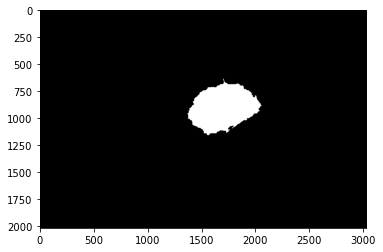

In [26]:
im = plt.imread('data/example_image/ISIC_0001769.jpg')
mask=plt.imread('data/example_segmentation/ISIC_0001769_segmentation.png')

plt.imshow(mask, cmap='gray')

In [102]:
class Lesion:
    # compactness, symmetry, colour
    def __init__(self, ID, im, seg):
        self.ID = ID
        self.im = im
        self.seg = seg
        
        # a,b = np.where(seg == 1)
        a,b = np.asarray(seg == 1).nonzero()

        self.bottom, self.top, self.leftmost, self.rightmost = max(a), min(a), min(b), max(b)
        self.center = (  (self.top+self.bottom) // 2  ,  (self.leftmost + self.rightmost) // 2  )
        # note the center is from the original, and not the cropped image
        
        margin = 50
        self.croppedSeg = self.seg[self.top-margin:self.bottom+margin, self.leftmost-margin:self.rightmost+margin]
        #im_part = im[60:120,130:220,:]
        
        self.area = np.sum(seg)

        self.perimeter = self.findPerimeter()

        # perimeter**2 / ( 4*pi*area )    // compactness
        self.compactness = (self.perimeter**2) / (4*np.pi*self.area)

        self.RGB = self.getRGBVectors(im)

    def plotRGBScatter(self):
        fig = plt.figure()
        axis = fig.add_subplot(1,1,1, projection ='3d')

        r,g,b = list(self.RGB[0]), list(self.RGB[1]), list(self.RGB[2])

        axis.scatter(r,g,b, c='#ff0000', marker='o', alpha=0.05)
        axis.set_xlabel('Red')
        axis.set_ylabel('Green')
        axis.set_zlabel('Blue')
        plt.show()
    def getRGBVectors(self, im):
        x,y = np.where(self.seg == 1)
        rgb = im[x,y,:].transpose()
        # rgb[0] = r, rgb[1] = g, rgb[2] = b
        return rgb
    def getRGBStats(self):
        

    def printlocation(self):
        print("top:", self.top, "bottom:", self.bottom, "leftmost:", self.leftmost, "rightmost:", self.rightmost)
        
    def showCropSeg(self):
        plt.imshow(self.croppedSeg, cmap="gray")

        
    def findPerimeter(self, show=False):
        struct_el = morphology.disk(20)
        seg_eroded = morphology.binary_erosion(self.seg, struct_el)
        self.perimeterimg = self.seg - seg_eroded
        if show:
            self.compareSeg(self.perimeterimg)
        
        self.perimeter = np.sum(self.perimeterimg)
        return self.perimeter
    
    def compareSeg(self, im):
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 12))
        axes[0].imshow(self.seg, cmap='gray')
        axes[1].imshow(im, cmap='gray')
        fig.tight_layout()
        

top: 636 bottom: 1156 leftmost: 1364 rightmost: 2051


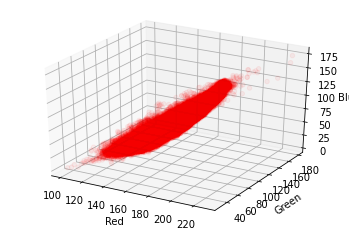

In [103]:
les1 = Lesion("0001769", im, mask)
# les1.findPerimeter(True)
les1.printlocation()
# plt.imshow(les1.seg[536:1256, 1264:2151], cmap="gray")
les1.plotRGBScatter()

top: 667 bottom: 1130 leftmost: 1201 rightmost: 1749


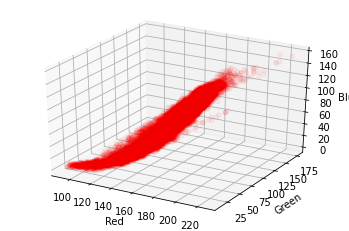

In [106]:
im2 = plt.imread('data/example_image/ISIC_0012204.jpg')
mask2=plt.imread('data/example_segmentation/ISIC_0012204_segmentation.png')
les2 = Lesion("0001769", im2, mask2)
# les1.findPerimeter(True)
les2.printlocation()
# plt.imshow(les1.seg[536:1256, 1264:2151], cmap="gray")
les2.plotRGBScatter()

top: 391 bottom: 1703 leftmost: 870 rightmost: 2232


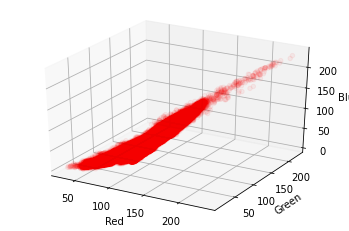

In [107]:
im3 = plt.imread('data/example_image/ISIC_0012143.jpg')
mask3=plt.imread('data/example_segmentation/ISIC_0012143_segmentation.png')
les3 = Lesion("0001769", im3, mask3)
# les1.findPerimeter(True)
les3.printlocation()
# plt.imshow(les1.seg[536:1256, 1264:2151], cmap="gray")
les3.plotRGBScatter()

(3, 216160)
216160.0


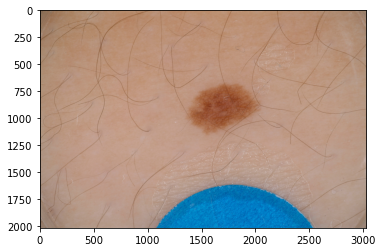

In [105]:
print(les1.RGB.shape)
print(les1.area)
plt.imshow(les1.im)

In [ ]:

im_copy = les1.seg.copy()
im_copy[les1.center[0]-3:les1.center[0]+3,les1.center[1]-3:les1.center[1]+3]  = np.tile(0, [6, 6])
plt.imshow(im_copy)

In [28]:
mask.shape

(2016, 3024)

In [29]:
len(mask[0])

3024

(array([ 636,  636,  636, ..., 1156, 1156, 1156], dtype=int64),
 array([1694, 1695, 1696, ..., 1562, 1563, 1564], dtype=int64))

In [38]:
mask.transpose()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)